[View in Colaboratory](https://colab.research.google.com/github/myfellowship/ML-DL-projects/blob/master/MNIST_with_Keras.ipynb)

https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [6]:
import keras
import theano

Using TensorFlow backend.


In [0]:
import numpy as np
np.random.seed(123)

In [0]:
#model importing 
from keras.models import Sequential

In [0]:
#core layers
from keras.layers import Dense, Dropout, Activation, Flatten

In [0]:
#CNN layers
from keras.layers import Convolution2D, MaxPooling2D

In [0]:
#utilites
from keras.utils import np_utils

load image data

In [12]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [14]:
print (X_train.shape)

(60000, 28, 28)


In [22]:
print (y_train.shape)

(60000,)


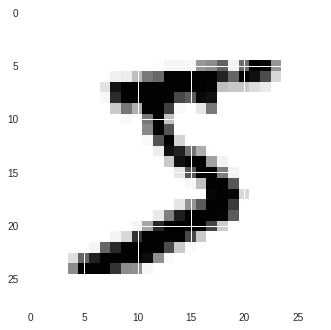

In [15]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [18]:
print (X_train.shape)

(60000, 1, 28, 28)


In [0]:
#convert to flaots and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
print (y_train.shape)

(60000,)


In [0]:
#y to categoritcal
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [27]:
print (Y_train.shape)

(60000, 10)


Model

In [0]:
model = Sequential()

In [0]:
#this prevents error. stockoverflow https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d

from keras import backend as K
K.set_image_dim_ordering('th')

In [32]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  """Entry point for launching an IPython kernel.


In [33]:
#second CNN layer
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

compile

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
#fit model
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.2151 - acc: 0.9346
Epoch 2/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0874 - acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0708 - acc: 0.9789
Epoch 4/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0571 - acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0511 - acc: 0.9843
Epoch 6/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.0445 - acc: 0.9858
Epoch 7/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0397 - acc: 0.9875
Epoch 8/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0376 - acc: 0.9882
Epoch 9/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0330 - acc: 0.9894
Epoch 10/10
60000/60000 [==============================] - 21s 345us/step - loss: 

Evaluate model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [38]:
score

[0.03019603101916491, 0.9913]